Compute statistics for each story

In [251]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
import re

In [1]:
# llm-generated stories
llm_stories = ["bookstore", "color", "starlight", "threads", "time", "whispers"]

In [5]:
# load in data files
data_folder = "../src/data/"
data_files = os.listdir(data_folder)
data_files = [f for f in data_files if f.endswith(".json") and 'new' in f]

sorted_data_files = sorted(data_files)
sorted_data_files

['alice-new-themes.json',
 'alice-new.json',
 'anne-new-themes.json',
 'anne-new.json',
 'bookstore-new-themes.json',
 'bookstore-new.json',
 'color-new-themes.json',
 'color-new.json',
 'emma-new-themes.json',
 'emma-new.json',
 'frankenstein-new-themes.json',
 'frankenstein-new.json',
 'gatsby-new-themes.json',
 'gatsby-new.json',
 'greatexp-new-themes.json',
 'greatexp-new.json',
 'mendips-new-themes.json',
 'mendips-new.json',
 'pride-new-themes.json',
 'pride-new.json',
 'romeo-new-themes.json',
 'romeo-new.json',
 'starlight-new-themes.json',
 'starlight-new.json',
 'threads-new-themes.json',
 'threads-new.json',
 'time-new-themes.json',
 'time-new.json',
 'victoria-new-themes.json',
 'victoria-new.json',
 'whispers-new-themes.json',
 'whispers-new.json',
 'wizard-new-themes.json',
 'wizard-new.json',
 'yourname-new-themes.json',
 'yourname-new.json']

In [16]:
# create df to store results
# this will have all data points
df = pd.DataFrame(columns=[
    "story", "themes", "llm_generated", 
    "num_lines", "num_chapters", "num_scenes", "num_characters", "num_locations", 
    "lines_per_chapter", "scenes_per_chapter", "characters_per_chapter", "locations_per_chapter",
    "lines_per_scene", "characters_per_scene"
    ])

# this is the average of the above
average_df = pd.DataFrame(columns=[
    "story", "themes", "llm_generated", 
    "lines_per_chapter", "scenes_per_chapter", "characters_per_chapter", "locations_per_chapter",
    "lines_per_scene", "characters_per_scene"
    ])

In [17]:
all_data = []
average_data = []

# loop through data files
for f in sorted_data_files:
    with open(data_folder + f, 'r') as file:
        data = json.load(file)

    # chapter/scene data
    chapter_data = data["chapters"]
    scene_data = data["scenes"]

    # general info
    story = f.split("-")[0]
    themes = "themes" in f
    llm_generated = story in llm_stories
    num_chapters = data["num_chapters"]
    num_scenes = data["num_scenes"]
    num_characters = data["num_characters"]
    num_locations = data["num_locations"]

    # chapter data
    lines_per_chapter = [chapter["num_lines"] for chapter in chapter_data]
    num_lines = sum(lines_per_chapter)
    scenes_per_chapter = [chapter["scenes"] for chapter in chapter_data]
    characters_per_chapter = [len(chapter["characters"]) for chapter in chapter_data]
    locations_per_chapter = [len(chapter["locations"]) for chapter in chapter_data]

    # scene data
    lines_per_scene = [scene["num_lines"] for scene in scene_data]
    characters_per_scene = [len(scene["characters"]) for scene in scene_data]

    # Add to the all_data list
    all_data.append({
        "story": story, 
        "themes": themes, 
        "llm_generated": llm_generated,
        "num_lines": num_lines, 
        "num_chapters": num_chapters, 
        "num_scenes": num_scenes, 
        "num_characters": num_characters, 
        "num_locations": num_locations, 
        "lines_per_chapter": lines_per_chapter,
        "scenes_per_chapter": scenes_per_chapter,
        "characters_per_chapter": characters_per_chapter, 
        "locations_per_chapter": locations_per_chapter, 
        "lines_per_scene": lines_per_scene, 
        "characters_per_scene": characters_per_scene
    })

    # Add to the average_data list
    average_data.append({
        "story": story, 
        "themes": themes, 
        "llm_generated": llm_generated,
        "lines_per_chapter": sum(lines_per_chapter) / num_chapters,
        "scenes_per_chapter": sum(scenes_per_chapter) / num_chapters,
        "characters_per_chapter": sum(characters_per_chapter) / num_chapters, 
        "locations_per_chapter": sum(locations_per_chapter) / num_chapters, 
        "lines_per_scene": sum(lines_per_scene) / num_scenes, 
        "characters_per_scene": sum(characters_per_scene) / num_scenes
    })

# Convert lists to DataFrames
df = pd.DataFrame(all_data)
average_df = pd.DataFrame(average_data)

In [108]:
# number of stories
num_stories = len(df["story"].unique())
num_stories

18

In [18]:
df.head()

,story,themes,llm_generated,num_lines,num_chapters,num_scenes,num_characters,num_locations,lines_per_chapter,scenes_per_chapter,characters_per_chapter,locations_per_chapter,lines_per_scene,characters_per_scene
0,alice,True,False,2463,12,52,61,21,"[181, 172, 156, 216, 213, 235, 232, 231, 224, ...","[10, 1, 5, 9, 1, 3, 1, 1, 11, 1, 8, 1]","[15, 5, 15, 17, 4, 8, 4, 4, 18, 3, 11, 3]","[7, 1, 3, 5, 1, 2, 1, 1, 8, 1, 1, 1]","[5, 13, 17, 25, 37, 22, 5, 3, 10, 14, 171, 18,...","[3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 5, 3, 3, 4, 4, ..."
1,alice,False,False,2463,12,101,37,21,"[181, 172, 156, 216, 213, 235, 232, 231, 224, ...","[8, 9, 7, 11, 5, 6, 15, 9, 6, 8, 8, 9]","[2, 7, 11, 4, 3, 6, 4, 11, 5, 3, 11, 6]","[5, 3, 4, 6, 3, 5, 3, 2, 5, 3, 1, 3]","[23, 19, 21, 15, 32, 22, 19, 24, 21, 9, 18, 33...","[2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ..."
2,anne,True,False,9003,38,232,296,18,"[238, 410, 199, 197, 168, 162, 106, 253, 216, ...","[6, 7, 1, 5, 8, 4, 1, 4, 2, 5, 2, 7, 9, 6, 9, ...","[14, 19, 4, 11, 24, 14, 4, 11, 6, 15, 7, 13, 2...","[4, 5, 1, 1, 3, 3, 1, 2, 1, 2, 2, 2, 3, 2, 3, ...","[28, 37, 47, 33, 78, 15, 24, 26, 50, 80, 85, 9...","[3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, ..."
3,anne,False,False,9064,36,219,46,45,"[297, 410, 199, 197, 168, 162, 106, 253, 216, ...","[4, 8, 8, 5, 9, 8, 4, 9, 8, 5, 4, 4, 6, 7, 6, ...","[2, 4, 3, 3, 4, 6, 2, 2, 4, 4, 2, 5, 2, 3, 6, ...","[2, 4, 2, 2, 4, 5, 1, 5, 3, 3, 3, 3, 2, 1, 4, ...","[65, 113, 37, 23, 20, 35, 42, 181, 36, 31, 37,...","[1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, ..."
4,bookstore,True,True,1388,12,59,68,8,"[159, 71, 159, 73, 68, 137, 70, 74, 124, 216, ...","[6, 1, 11, 4, 1, 3, 6, 7, 5, 7, 4, 4]","[13, 5, 18, 7, 5, 8, 13, 13, 10, 14, 9, 8]","[1, 1, 2, 1, 1, 3, 2, 1, 3, 2, 1, 2]","[24, 11, 21, 12, 23, 32, 70, 9, 9, 9, 9, 10, 1...","[4, 3, 3, 3, 2, 4, 5, 3, 4, 3, 3, 3, 3, 3, 4, ..."


In [19]:
average_df.head()

,story,themes,llm_generated,lines_per_chapter,scenes_per_chapter,characters_per_chapter,locations_per_chapter,lines_per_scene,characters_per_scene
0,alice,True,False,205.250000,4.333333,8.916667,2.666667,41.673077,3.038462
1,alice,False,False,205.250000,8.416667,6.083333,3.583333,24.306931,2.544554
2,anne,True,False,236.921053,6.105263,16.105263,2.605263,35.767241,3.353448
3,anne,False,False,251.777778,6.083333,5.944444,3.666667,39.579909,2.639269
4,bookstore,True,True,115.666667,4.916667,10.250000,1.666667,22.576271,3.186441


In [25]:
# get average for average_df
llm_avg = average_df.groupby(["llm_generated"]).mean(numeric_only=True)
theme_avg = average_df.groupby(["themes"]).mean(numeric_only=True)

# sd for average_df
llm_sd = average_df.groupby(["llm_generated"]).std(numeric_only=True)
theme_sd = average_df.groupby(["themes"]).std(numeric_only=True)

In [22]:
llm_avg

,themes,lines_per_chapter,scenes_per_chapter,characters_per_chapter,locations_per_chapter,lines_per_scene,characters_per_scene
llm_generated,,,,,,,
False,0.5,372.621967,6.595415,12.548007,3.587270,50.971011,3.187823
True,0.5,132.361111,4.875000,8.201389,2.756944,25.476616,2.738452


In [26]:
llm_sd

,themes,lines_per_chapter,scenes_per_chapter,characters_per_chapter,locations_per_chapter,lines_per_scene,characters_per_scene
llm_generated,,,,,,,
False,0.510754,201.888360,1.525813,6.319403,1.022295,26.711114,0.503002
True,0.522233,10.146237,0.476069,4.403921,0.602455,2.675571,0.588736


In [24]:
theme_avg

,llm_generated,lines_per_chapter,scenes_per_chapter,characters_per_chapter,locations_per_chapter,lines_per_scene,characters_per_scene
themes,,,,,,,
False,0.333333,290.016949,6.050994,6.659894,3.316307,43.691261,2.729053
True,0.333333,295.053081,5.992892,15.538374,3.304683,41.254498,3.347012


In [27]:
theme_sd

,llm_generated,lines_per_chapter,scenes_per_chapter,characters_per_chapter,locations_per_chapter,lines_per_scene,characters_per_scene
themes,,,,,,,
False,0.485071,199.239620,1.603807,2.640640,1.055132,27.462721,0.631087
True,0.485071,206.557507,1.454412,5.173455,0.927287,22.769593,0.247334


In [261]:
def compare_strings(s1: str, s2: str) -> bool:
    """
    Compare if two strings are equal ignoring case and punctuation.

    Args:
        s1 (str): The first string to compare.
        s2 (str): The second string to compare.

    Returns:
        bool: True if the strings are equal ignoring case and punctuation, False otherwise.
    """
    # Remove punctuation and convert to lowercase
    def preprocess(s: str) -> str:
        # Normalize case and remove punctuation except periods for 'CHAPTER X.'
        s = ''.join(char.lower() if char != '.' else '' for char in s if char not in string.punctuation or char == '.')
        # Extract "chapter <number>" using regex
        match = re.match(r'\bchapter\s+\w+', s)
        return match.group(0) if match else s.strip()

    return preprocess(s1) == preprocess(s2)

In [269]:
# get diffs between theme and non-theme version of each story
diffs = []
for story in df["story"].unique():
    # print(story)
    theme_data = df[(df["story"] == story) & (df["themes"] == True)]
    non_theme_data = df[(df["story"] == story) & (df["themes"] == False)]

    # diff in number of chapters, scenes and locations per story
    diff_num_chapters = non_theme_data["num_chapters"].values[0] - theme_data["num_chapters"].values[0]
    diff_num_scenes = non_theme_data["num_scenes"].values[0] - theme_data["num_scenes"].values[0]
    diff_num_locations = non_theme_data["num_locations"].values[0] - theme_data["num_locations"].values[0]

    with open(data_folder + story + "-new.json", 'r') as file:
        char_data = json.load(file)

    with open(data_folder + story + "-new-themes.json", 'r') as file:
        themes_data = json.load(file)

    non_theme_chapters = char_data["chapters"]
    theme_chapters = themes_data["chapters"]

    non_theme_names = [chapter["chapter"] for chapter in non_theme_chapters]
    theme_names = [chapter["chapter"] for chapter in theme_chapters]

    # collect chapters in both versions
    common_chapters = []
    for non_theme_chapter in non_theme_names:
        if any(compare_strings(non_theme_chapter, theme_chapter) for theme_chapter in theme_names):
            common_chapters.append(non_theme_chapter)

    # diff in number of scenes and locations per chapter
    scenes_per_chapter_diff = []
    locations_per_chapter_diff = []
    for chapter in common_chapters:
        non_theme_chapter = next((c for c in non_theme_chapters if compare_strings(c["chapter"], chapter)), None)
        theme_chapter = next((c for c in theme_chapters if compare_strings(c["chapter"], chapter)), None)
        scenes_per_chapter_diff.append(non_theme_chapter["scenes"] - theme_chapter["scenes"])
        locations_per_chapter_diff.append(len(non_theme_chapter["locations"]) - len(theme_chapter["locations"]))
    avg_scene_per_chapter_diff = np.mean(scenes_per_chapter_diff)
    avg_location_per_chapter_diff = np.mean(locations_per_chapter_diff)

    # diff in number of lines per scene
    theme_data_avg = average_df[(average_df["story"] == story) & (average_df["themes"] == True)]
    non_theme_data_avg = average_df[(average_df["story"] == story) & (average_df["themes"] == False)]
    scene_lines_diff = non_theme_data_avg["lines_per_scene"].values[0] - theme_data_avg["lines_per_scene"].values[0]


    # append to diffs
    diffs.append({
        "story": story,
        "llm_generated": theme_data["llm_generated"].values[0],
        "diff_num_chapters": diff_num_chapters,
        "diff_num_scenes": diff_num_scenes,
        "diff_num_locations": diff_num_locations,
        "scene_per_chapter_diff": scenes_per_chapter_diff,
        "avg_scene_per_chapter_diff": avg_scene_per_chapter_diff,
        "locations_per_chapter_diff": locations_per_chapter_diff,
        "avg_location_per_chapter_diff": avg_location_per_chapter_diff,
        "scene_lines_diff": scene_lines_diff
    })

# convert to DataFrame
diff_df = pd.DataFrame(diffs)
diff_df.head()

,story,llm_generated,diff_num_chapters,diff_num_scenes,diff_num_locations,scene_per_chapter_diff,avg_scene_per_chapter_diff,locations_per_chapter_diff,avg_location_per_chapter_diff,scene_lines_diff
0,alice,False,0,49,0,"[-2, 8, 2, 2, 4, 3, 14, 8, -5, 7, 0, 8]",4.083333,"[-2, 2, 1, 1, 2, 3, 2, 1, -3, 2, 0, 2]",0.916667,-17.366146
1,anne,False,-2,-13,27,"[-2, 1, 7, 0, 1, 4, 3, 5, 6, 0, 2, -3, -3, 1, ...",-0.055556,"[-2, -1, 1, 1, 1, 2, 0, 3, 2, 1, 1, 1, -1, -1,...",1.083333,3.812667
2,bookstore,True,0,-1,0,"[0, 0, -1, 2, 0, 0, 3, -6, 0, 0, 0, 1]",-0.083333,"[0, 0, 0, 1, 0, 0, 2, 0, -1, 0, 0, 0]",0.166667,0.303039
3,color,True,0,0,-5,"[1, 0, 0, 2, 0, -1, 0, -1, 0, -2, 0, 1]",0.000000,"[-2, 0, 0, 0, 0, -1, 0, -1, 0, 0, -1, 1]",-0.333333,-1.515152
4,emma,False,0,-2,-7,"[0, -3, -4, -4, 3, 0, 0, 1, 1, 0, 0, 0, -1, 2,...",-0.111111,"[0, -1, -2, -6, 2, 1, -2, -1, 1, 0, 1, 1, -1, ...",-0.111111,0.904416


In [270]:
# get average for diff_df based on llm_generated
llm_diff_avg = diff_df.groupby(["llm_generated"]).mean(numeric_only=True)
llm_diff_avg

,diff_num_chapters,diff_num_scenes,diff_num_locations,avg_scene_per_chapter_diff,avg_location_per_chapter_diff,scene_lines_diff
llm_generated,,,,,,
False,0.0,0.75,-1.500000,0.292720,0.255367,3.602184
True,0.0,-1.00,-3.333333,-0.083333,-0.291667,0.105921


In [271]:
# sd for diff_df based on llm_generated
llm_diff_sd = diff_df.groupby(["llm_generated"]).std(numeric_only=True)
llm_diff_sd

,diff_num_chapters,diff_num_scenes,diff_num_locations,avg_scene_per_chapter_diff,avg_location_per_chapter_diff,scene_lines_diff
llm_generated,,,,,,
False,0.738549,31.614510,17.490257,2.392132,1.018546,25.058305
True,0.000000,2.529822,2.804758,0.210819,0.364196,1.161511


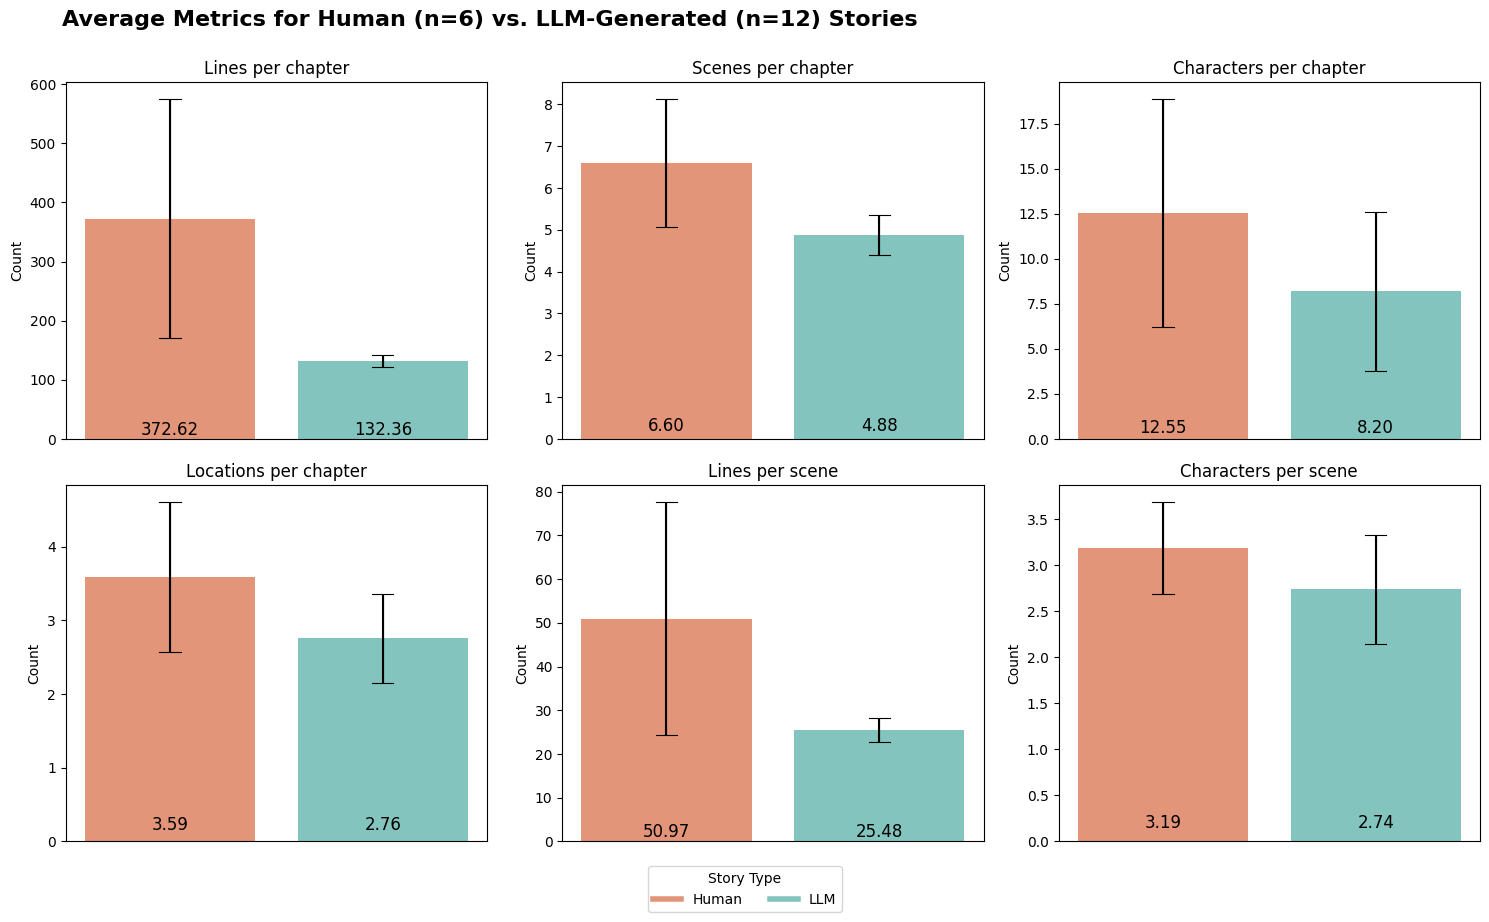

In [131]:
# Plot with adjusted label size and position slightly above y=0
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9), sharex=False, sharey=False)
axes = axes.flatten()

colors = ['#e29578', '#83c5be']

# Transpose for easier plotting
# remove 'theme' row
avg_transposed = llm_avg.transpose()
avg_transposed = avg_transposed.drop('themes')
std_transposed = llm_sd.transpose()
std_transposed = std_transposed.drop('themes')

for i, (metric, values) in enumerate(avg_transposed.iterrows()):
    ax = axes[i]
    std_values = std_transposed.loc[metric]
    
    # Plot bars with error bars
    bars = ax.bar(values.index, values.values, color=colors, yerr=std_values.values, capsize=0)
    
    # Adjusted error bar styling: thinner and gray
    for bar, std in zip(bars, std_values.values):
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        # Thinner horizontal lines for error bars
        ax.plot([x - 0.05, x + 0.05], [y + std, y + std], color='black', lw=0.8)  # Top horizontal line
        ax.plot([x - 0.05, x + 0.05], [y - std, y - std], color='black', lw=0.8)  # Bottom horizontal line
        # Thinner vertical line for error bars
        ax.vlines(x, y - std, y + std, color='black', lw=0.8)  # Vertical error line (ensure gray is set explicitly)

    ax.set_title(metric.replace('_', ' ').capitalize())
    ax.set_ylabel("Count")
    ax.set_xticks([])  # Remove x-axis labels
    ax.set_xlabel("")  # Remove x-axis title
    
    # Add labels slightly above y=0
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            0.1,  # Slightly above y=0
            f'{bar.get_height():.2f}',
            ha='center',
            va='bottom',
            fontsize=12  # Slightly larger font size
        )

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)


# add main title
fig.suptitle("Average Metrics for Human (n=6) vs. LLM-Generated (n=12) Stories", fontsize=16, fontweight='bold', x=0.33, y=0.95)

# Add one overall legend with correct color order
fig.legend(labels=['Human', 'LLM'], loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.06), title="Story Type", handles=[
    plt.Line2D([0], [0], color=colors[0], lw=4),
    plt.Line2D([0], [0], color=colors[1], lw=4),
])
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

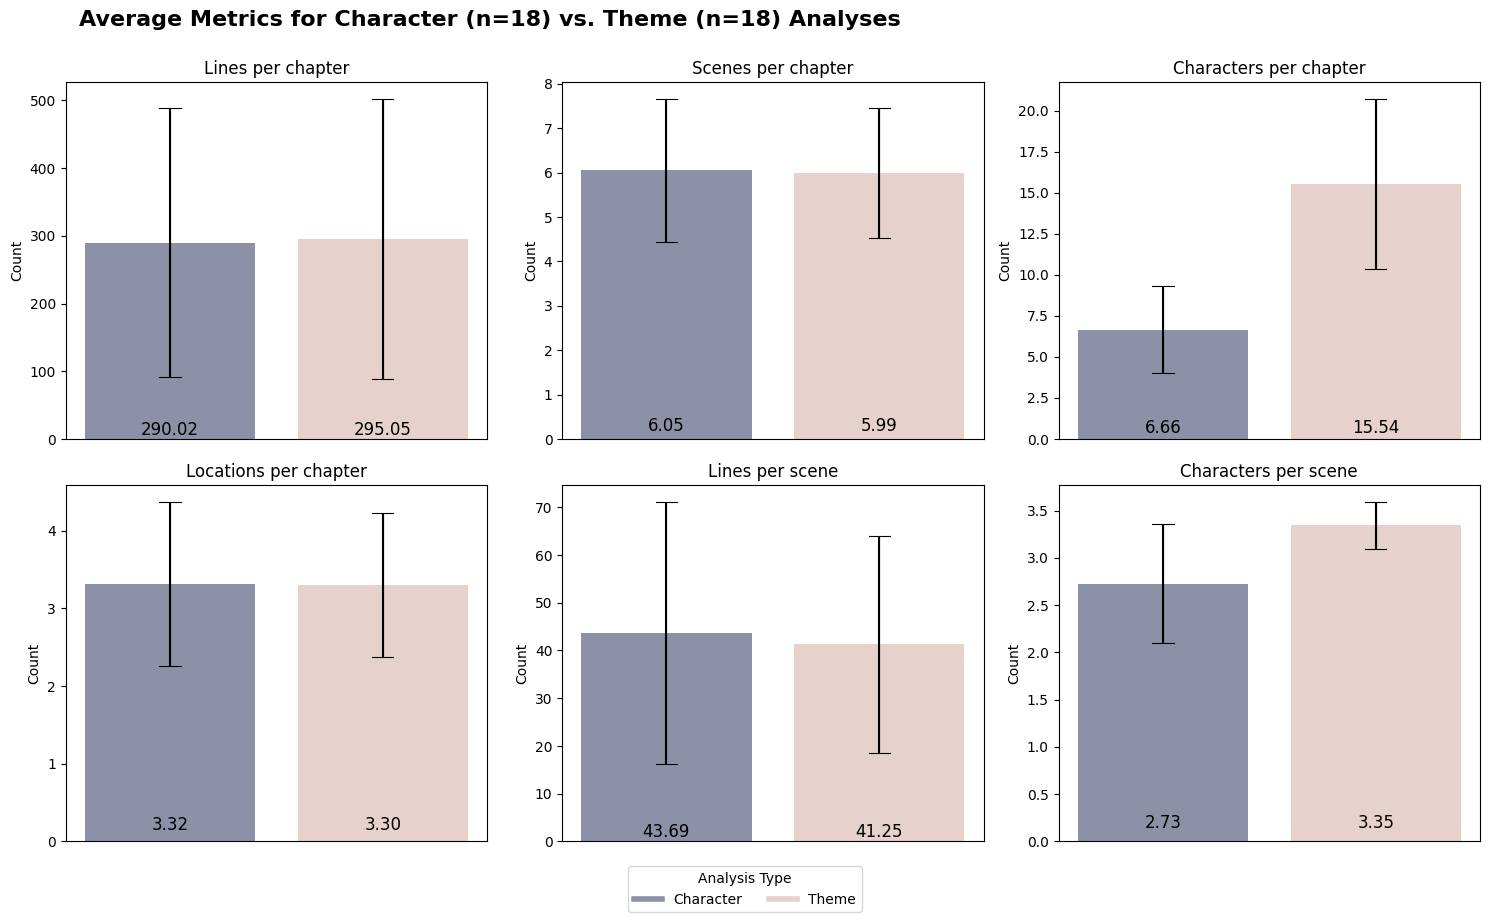

In [151]:
# Plot with adjusted label size and position slightly above y=0
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 9), sharex=False, sharey=False)
axes = axes.flatten()

colors = ['#8d91a8', '#e6d1cc']

# Transpose for easier plotting
# remove 'theme' row
avg_transposed = theme_avg.transpose()
avg_transposed = avg_transposed.drop('llm_generated')
std_transposed = theme_sd.transpose()
std_transposed = std_transposed.drop('llm_generated')

for i, (metric, values) in enumerate(avg_transposed.iterrows()):
    ax = axes[i]
    std_values = std_transposed.loc[metric]
    
    # Plot bars with error bars
    bars = ax.bar(values.index, values.values, color=colors, yerr=std_values.values, capsize=0)
    
    # Adjusted error bar styling: thinner and gray
    for bar, std in zip(bars, std_values.values):
        x = bar.get_x() + bar.get_width() / 2
        y = bar.get_height()
        # Thinner horizontal lines for error bars
        ax.plot([x - 0.05, x + 0.05], [y + std, y + std], color='black', lw=0.8)  # Top horizontal line
        ax.plot([x - 0.05, x + 0.05], [y - std, y - std], color='black', lw=0.8)  # Bottom horizontal line
        # Thinner vertical line for error bars
        ax.vlines(x, y - std, y + std, color='black', lw=0.8)  # Vertical error line (ensure gray is set explicitly)

    ax.set_title(metric.replace('_', ' ').capitalize())
    ax.set_ylabel("Count")
    ax.set_xticks([])  # Remove x-axis labels
    ax.set_xlabel("")  # Remove x-axis title
    
    # Add labels slightly above y=0
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            0.1,  # Slightly above y=0
            f'{bar.get_height():.2f}',
            ha='center',
            va='bottom',
            fontsize=12  # Slightly larger font size
        )

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)


# add main title
fig.suptitle("Average Metrics for Character (n=18) vs. Theme (n=18) Analyses", fontsize=16, fontweight='bold', x=0.33, y=0.95)

# Add one overall legend with correct color order
fig.legend(labels=['Character', 'Theme'], loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.06), title="Analysis Type", handles=[
    plt.Line2D([0], [0], color=colors[0], lw=4),
    plt.Line2D([0], [0], color=colors[1], lw=4),
])
fig.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

In [274]:
df_lines_exploded = df.explode("lines_per_chapter", ignore_index=True)
df_lines_per_chapter = df_lines_exploded[["story", "llm_generated", "themes", "lines_per_chapter"]]
print(len(df_lines_per_chapter))

df_lines_scene_exploded = df.explode("lines_per_scene", ignore_index=True)
df_lines_per_scene = df_lines_scene_exploded[["story", "llm_generated", "themes", "lines_per_scene"]]
print(len(df_lines_per_scene))

df_characters_exploded = df.explode("characters_per_chapter", ignore_index=True)
df_characters_per_chapter = df_characters_exploded[["story", "llm_generated", "themes", "characters_per_chapter"]]
print(len(df_characters_per_chapter))

df_characters_scene_exploded = df.explode("characters_per_scene", ignore_index=True)
df_characters_per_scene = df_characters_scene_exploded[["story", "llm_generated", "themes", "characters_per_scene"]]
print(len(df_characters_per_scene))

df_locations_exploded = df.explode("locations_per_chapter", ignore_index=True)
df_locations_per_chapter = df_locations_exploded[["story", "llm_generated", "themes", "locations_per_chapter"]]
print(len(df_locations_per_chapter))

df_scenes_exploded = df.explode("scenes_per_chapter", ignore_index=True)
df_scenes_per_chapter = df_scenes_exploded[["story", "llm_generated", "themes", "scenes_per_chapter"]]
print(len(df_scenes_per_chapter))

df_scenes_diff_exploded = diff_df.explode("scene_per_chapter_diff", ignore_index=True)
df_scenes_per_chapter_diff = df_scenes_diff_exploded[["story", "llm_generated", "scene_per_chapter_diff"]]
print(len(df_scenes_per_chapter_diff))

df_locations_diff_exploded = diff_df.explode("locations_per_chapter_diff", ignore_index=True)
df_locations_per_chapter_diff = df_locations_diff_exploded[["story", "llm_generated", "locations_per_chapter_diff"]]
print(len(df_locations_per_chapter_diff))

# create map with all df
df_map = {
    "lines_per_chapter": df_lines_per_chapter,
    "lines_per_scene": df_lines_per_scene,
    "characters_per_chapter": df_characters_per_chapter,
    "characters_per_scene": df_characters_per_scene,
    "locations_per_chapter": df_locations_per_chapter,
    "scenes_per_chapter": df_scenes_per_chapter,
    "scene_per_chapter_diff": df_scenes_per_chapter_diff,
    "locations_per_chapter_diff": df_locations_per_chapter_diff
}

634
3742
634
3742
634
634
314
314


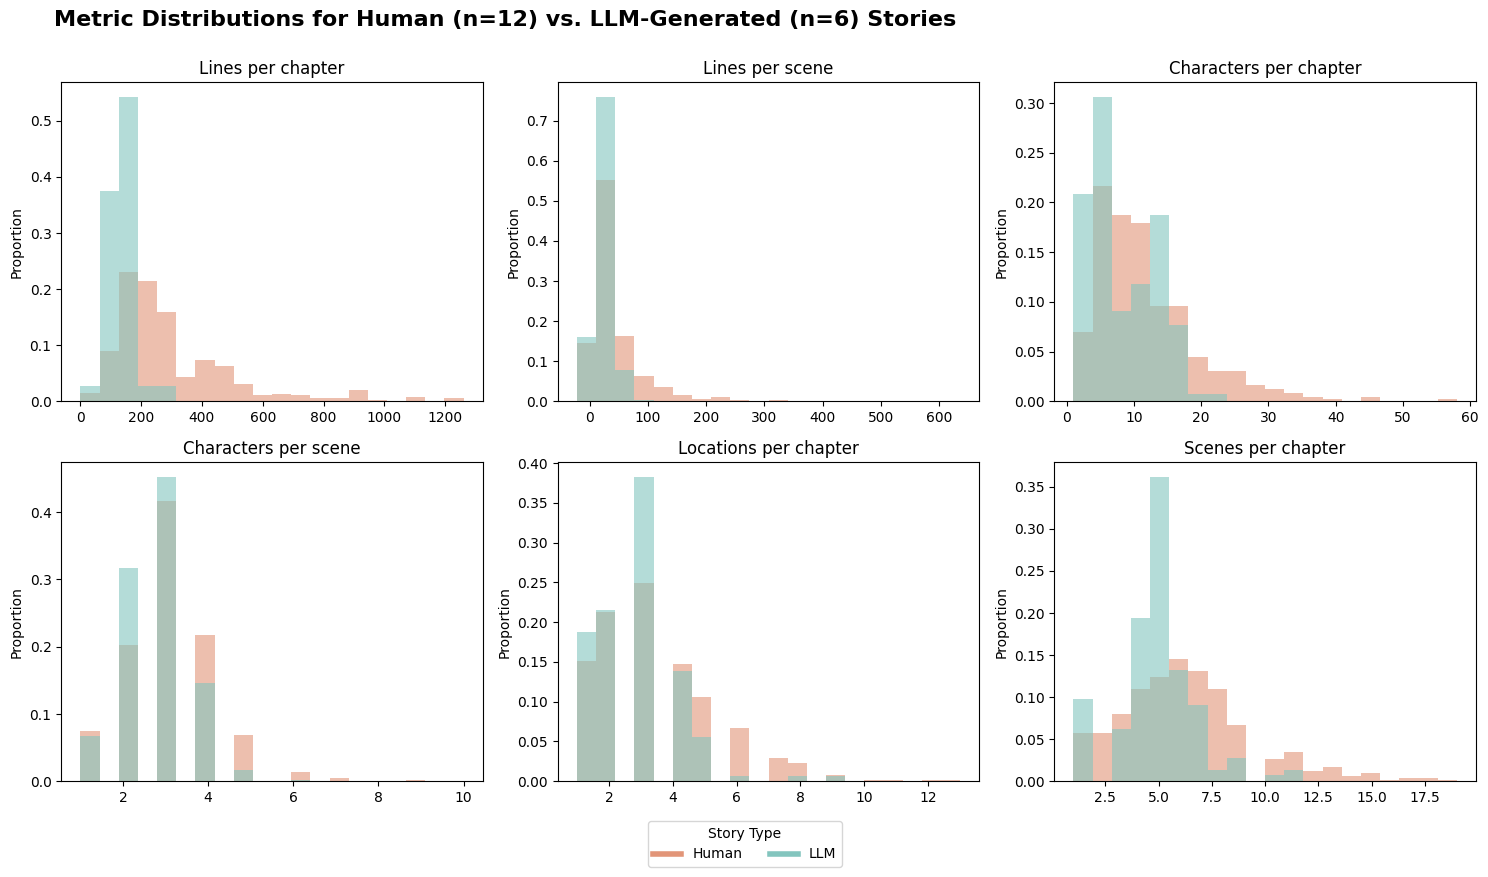

In [ ]:
# Define metrics and prepare data
metrics = ['lines_per_chapter', 'lines_per_scene', 'characters_per_chapter', 'characters_per_scene', 'locations_per_chapter', 'scenes_per_chapter']
num_metrics = len(metrics)
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 9), sharex=False, sharey=False)
axes = axes.flatten()

# Colors for the histograms
human_color = '#e29578'
llm_color = '#83c5be'

for i, metric in enumerate(metrics):
    ax = axes[i]

    # Filter data for human and LLM-generated separately
    human_data = df_map[metric][df_map[metric]['llm_generated'] == False]
    llm_data = df_map[metric][df_map[metric]['llm_generated'] == True]

    # Normalize Human data
    human_counts, human_bins = np.histogram(human_data[metric], bins=20)
    human_proportions = human_counts / human_counts.sum()  # Normalize to proportions

    # Normalize LLM data
    llm_counts, llm_bins = np.histogram(llm_data[metric], bins=human_bins)  # Use same bins for comparison
    llm_proportions = llm_counts / llm_counts.sum()  # Normalize to proportions

    # Plot histograms for Human data
    ax.bar(human_bins[:-1], human_proportions, width=np.diff(human_bins), color=human_color, alpha=0.6, label="Human", align='edge')

    # Plot histograms for LLM data
    ax.bar(llm_bins[:-1], llm_proportions, width=np.diff(llm_bins), color=llm_color, alpha=0.6, label="LLM", align='edge')

    # Set titles and labels
    ax.set_title(metric.replace('_', ' ').capitalize())
    ax.set_ylabel("Proportion")
    ax.set_xlabel("")

# Hide any unused subplots
for j in range(num_metrics, len(axes)):
    axes[j].set_visible(False)

# Add main title
fig.suptitle("Metric Distributions for Human (n=12) vs. LLM-Generated (n=6) Stories", fontsize=16, fontweight='bold', y=0.95, x=0.34)

# Add a single legend
fig.legend(labels=['Human', 'LLM'], loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.01), title="Story Type",
           handles=[
               plt.Line2D([0], [0], color=human_color, lw=4),
               plt.Line2D([0], [0], color=llm_color, lw=4),
           ])
fig.tight_layout(rect=[0, 0.05, 1, 0.95])

plt.show()


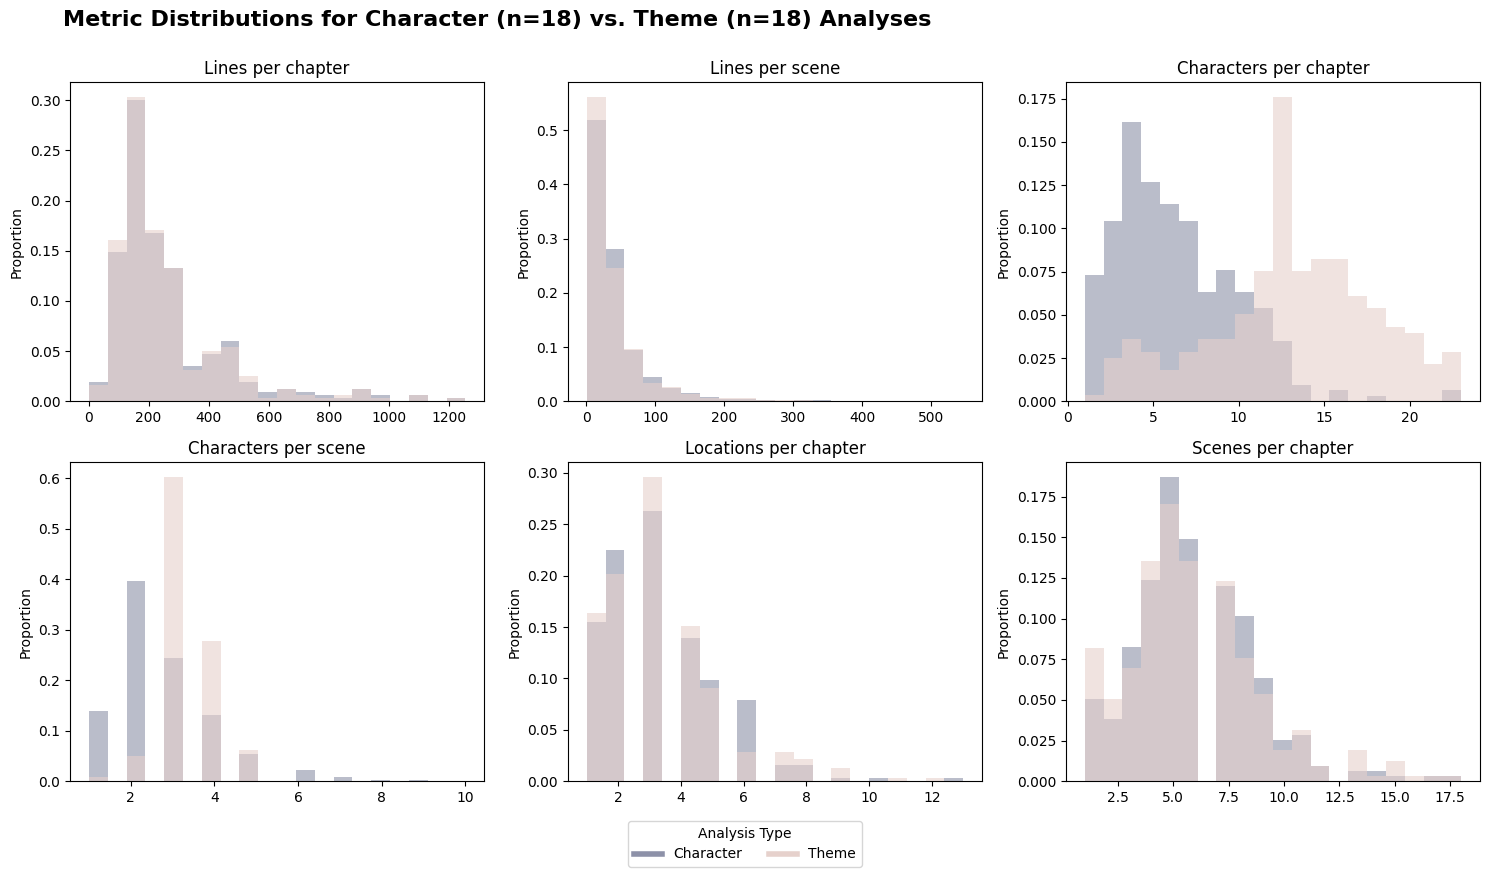

In [221]:
# Define metrics and prepare data
metrics = ['lines_per_chapter', 'lines_per_scene', 'characters_per_chapter', 'characters_per_scene', 'locations_per_chapter', 'scenes_per_chapter']
num_metrics = len(metrics)
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 9), sharex=False, sharey=False)
axes = axes.flatten()

colors = ['#8d91a8', '#e6d1cc']

# Colors for the histograms
character_color = colors[0]
theme_color = colors[1]

for i, metric in enumerate(metrics):
    ax = axes[i]

    # Filter data for character and theme analyses separately
    character_data = df_map[metric][df_map[metric]['themes'] == False]
    theme_data = df_map[metric][df_map[metric]['themes'] == True]

    # Normalize Character data
    character_counts, character_bins = np.histogram(character_data[metric], bins=20)
    character_proportions = character_counts / character_counts.sum()  # Normalize to proportions

    # Normalize Theme data
    theme_counts, theme_bins = np.histogram(theme_data[metric], bins=character_bins)  # Use same bins for comparison
    theme_proportions = theme_counts / theme_counts.sum()  # Normalize to proportions

    # Plot histograms for Human data
    ax.bar(character_bins[:-1], character_proportions, width=np.diff(character_bins), color=character_color, alpha=0.6, label="Human", align='edge')

    # Plot histograms for LLM data
    ax.bar(theme_bins[:-1], theme_proportions, width=np.diff(theme_bins), color=theme_color, alpha=0.6, label="LLM", align='edge')

    # Set titles and labels
    ax.set_title(metric.replace('_', ' ').capitalize())
    ax.set_ylabel("Proportion")
    ax.set_xlabel("")

# Hide any unused subplots
for j in range(num_metrics, len(axes)):
    axes[j].set_visible(False)

# Add main title
fig.suptitle("Metric Distributions for Character (n=18) vs. Theme (n=18) Analyses", fontsize=16, fontweight='bold', y=0.95, x=0.335)

# Add a single legend
fig.legend(labels=['Character', 'Theme'], loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.01), title="Analysis Type",
           handles=[
               plt.Line2D([0], [0], color=character_color, lw=4),
               plt.Line2D([0], [0], color=theme_color, lw=4),
           ])
fig.tight_layout(rect=[0, 0.05, 1, 0.95])

plt.show()


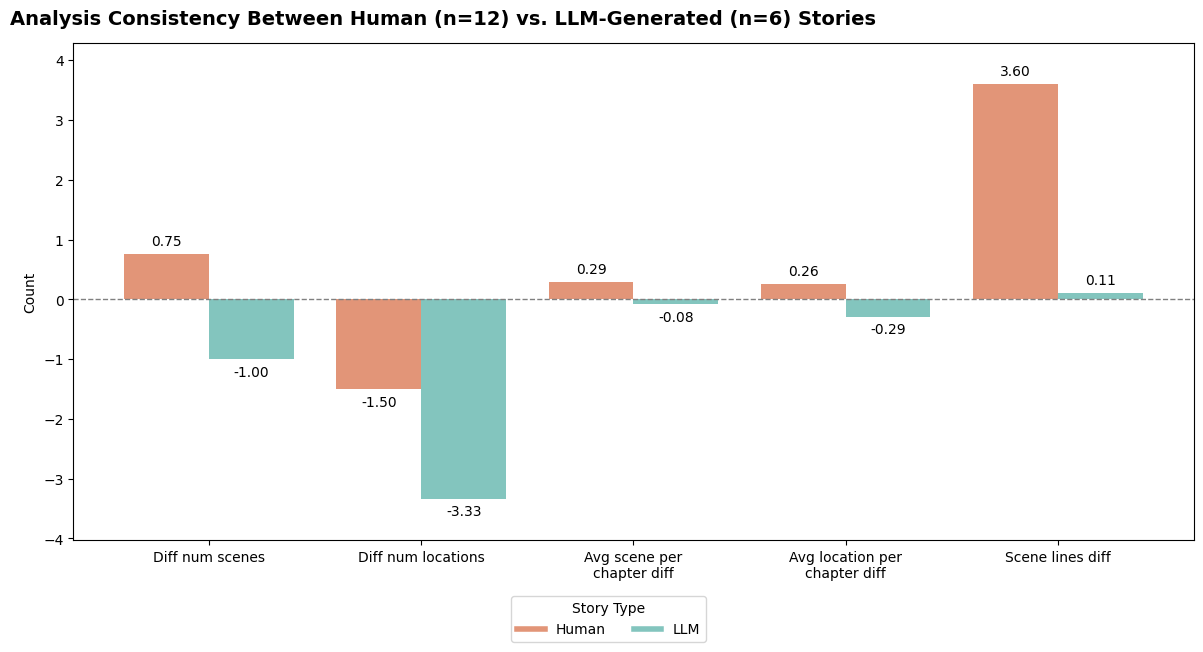

In [324]:
colors = ['#e29578', '#83c5be']
labels = ['Human', 'LLM']

# Transpose for easier plotting
avg_transposed = llm_diff_avg.transpose()
std_transposed = llm_diff_sd.transpose()
# remove 'diff_num_chapters' row
avg_transposed = avg_transposed.drop('diff_num_chapters')
std_transposed = std_transposed.drop('diff_num_chapters')

# Metrics on the x-axis
metrics = avg_transposed.index.str.replace('_', ' ').str.capitalize()

# Function to wrap labels after `n` words
def wrap_label(label, n=3):
    words = label.split()
    wrapped = '\n'.join([' '.join(words[i:i + n]) for i in range(0, len(words), n)])
    return wrapped

# Apply wrapping
wrapped_labels = [wrap_label(label, n=3) for label in metrics]

x_positions = np.arange(len(metrics))  # X positions for metrics
bar_width = 0.4

# Prepare a figure
fig, ax = plt.subplots(figsize=(12, 6))

# Add a horizontal line at y=0
ax.axhline(0, color='gray', linestyle='--', linewidth=1)

# Calculate data range to expand y-axis
all_values = avg_transposed.values.flatten()
y_min, y_max = np.min(all_values), np.max(all_values)
y_range = y_max - y_min
ax.set_ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)

# Plot bars for Character and Theme
for i, label in enumerate(labels):
    values = avg_transposed.iloc[:, i]
    std_values = std_transposed.iloc[:, i]
    
    bars = ax.bar(
        x_positions + i * bar_width - bar_width / 2,
        values,
        width=bar_width,
        color=colors[i],
        label=label,
        capsize=4
    )
    for bar in bars:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.1 if bar.get_height() >= 0 else bar.get_height() - 0.1,
            f'{bar.get_height():.2f}',
            ha='center',
            va='bottom' if bar.get_height() >= 0 else 'top',
            fontsize=10
        )

# Customize the x-axis
ax.set_xticks(x_positions)
ax.set_xticklabels(wrapped_labels, rotation=0, ha='center')  # Apply wrapped labels
ax.set_ylabel("Count")
ax.set_title("Analysis Consistency Between Human (n=12) vs. LLM-Generated (n=6) Stories", fontsize=14, fontweight='bold', x=0.33, y=1.02)

# Add a legend
fig.legend(labels=labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.09), title="Story Type",
           handles=[
               plt.Line2D([0], [0], color=colors[0], lw=4),
               plt.Line2D([0], [0], color=colors[1], lw=4),
           ])

fig.tight_layout()
plt.show()

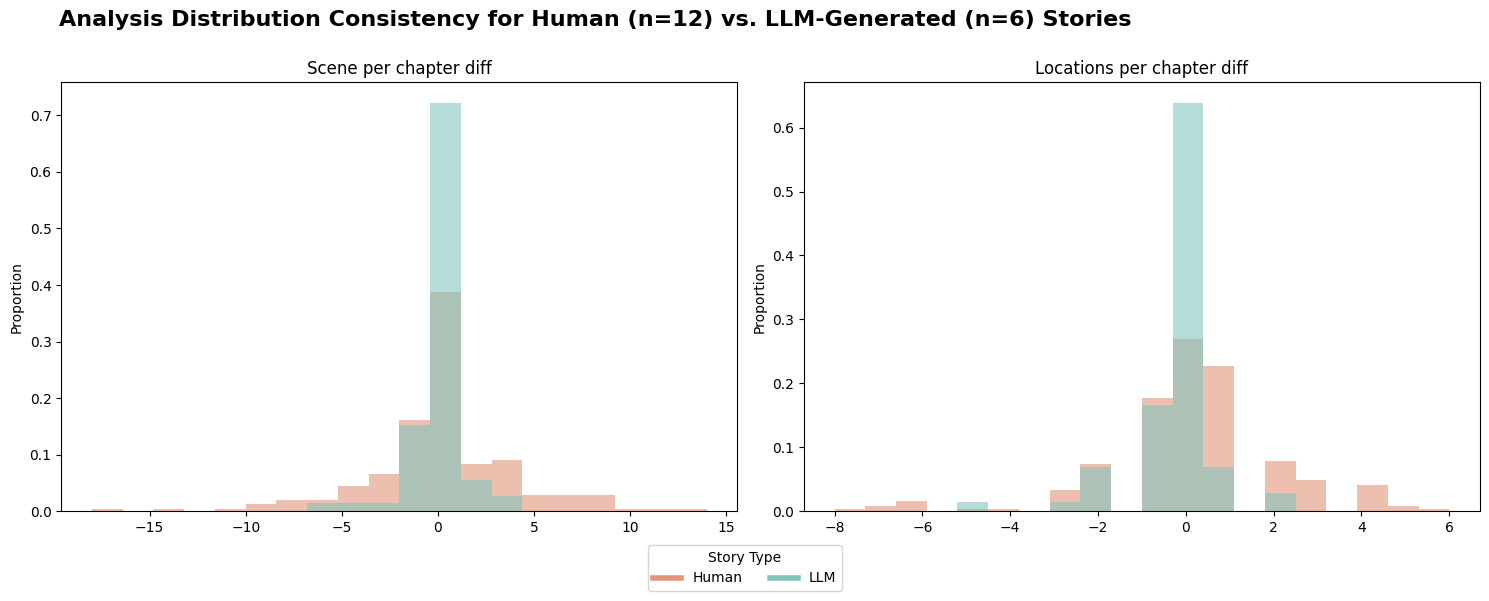

In [327]:
# Define metrics and prepare data
metrics = ['scene_per_chapter_diff', 'locations_per_chapter_diff']
num_metrics = len(metrics)
nrows, ncols = 1, 2
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 6), sharex=False, sharey=False)
axes = axes.flatten()

# Colors for the histograms
human_color = '#e29578'
llm_color = '#83c5be'

for i, metric in enumerate(metrics):
    ax = axes[i]

    # Filter data for human and LLM-generated separately
    human_data = df_map[metric][df_map[metric]['llm_generated'] == False]
    llm_data = df_map[metric][df_map[metric]['llm_generated'] == True]

    # Normalize Human data
    human_counts, human_bins = np.histogram(human_data[metric], bins=20)
    human_proportions = human_counts / human_counts.sum()  # Normalize to proportions

    # Normalize LLM data
    llm_counts, llm_bins = np.histogram(llm_data[metric], bins=human_bins)  # Use same bins for comparison
    llm_proportions = llm_counts / llm_counts.sum()  # Normalize to proportions

    # Plot histograms for Human data
    ax.bar(human_bins[:-1], human_proportions, width=np.diff(human_bins), color=human_color, alpha=0.6, label="Human", align='edge')

    # Plot histograms for LLM data
    ax.bar(llm_bins[:-1], llm_proportions, width=np.diff(llm_bins), color=llm_color, alpha=0.6, label="LLM", align='edge')

    # Set titles and labels
    ax.set_title(metric.replace('_', ' ').capitalize())
    ax.set_ylabel("Proportion")
    ax.set_xlabel("")

# Hide any unused subplots
for j in range(num_metrics, len(axes)):
    axes[j].set_visible(False)

# Add main title
fig.suptitle("Analysis Distribution Consistency for Human (n=12) vs. LLM-Generated (n=6) Stories", fontsize=16, fontweight='bold', y=0.95, x=0.4)

# Add a single legend
fig.legend(labels=['Human', 'LLM'], loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.03), title="Story Type",
           handles=[
               plt.Line2D([0], [0], color=human_color, lw=4),
               plt.Line2D([0], [0], color=llm_color, lw=4),
           ])
fig.tight_layout(rect=[0, 0.05, 1, 0.95])

plt.show()